<a href="https://colab.research.google.com/github/MattIzon/16010269_DataAnalytics/blob/main/Weather_Inspection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Set-up
from google.colab import auth, files
auth.authenticate_user()
print('Authenticated')

from google.cloud import bigquery
import pandas as pd
pd.set_option('display.max_columns', None)

Authenticated


In [36]:
# Get weather data

client = bigquery.Client(project='assignment-305921')

weather = []

for year in range(2015, 2020):
  weather.append(client.query('''
  SELECT stn,	mo,	temp,	dewp,	slp,	stp,	visib,	wdsp,	mxpsd,	gust,	max,	min,	prcp,	sndp,	fog,	rain_drizzle,	snow_ice_pellets,	hail,	thunder,	tornado_funnel_cloud,
  cast(CONCAT(`bigquery-public-data.noaa_gsod.gsod{0}`.year, "-", `bigquery-public-data.noaa_gsod.gsod{0}`.mo, "-", `bigquery-public-data.noaa_gsod.gsod{0}`.da)as DATE) as date
  FROM `bigquery-public-data.noaa_gsod.gsod{0}`
  WHERE (stn = '722126' AND wban = '04879') or (stn = '725300' AND wban = '94846') or (stn = '725340' AND wban = '14819')
  ORDER BY date
  '''.format(year)).to_dataframe())

In [37]:
# Count data from each station in each year to confirm data for every day for 3 chosen stations

stns = ['722126', '725300', '725340']
for index in range(len(weather)):
  print(2015 + index)
  for stn in stns:
    print(stn, weather[index].loc[weather[index]['stn']==stn, 'stn'].agg(['count']).to_string())
  print('-----')

2015
722126 count    365
725300 count    365
725340 count    365
-----
2016
722126 count    366
725300 count    366
725340 count    366
-----
2017
722126 count    365
725300 count    365
725340 count    365
-----
2018
722126 count    365
725300 count    365
725340 count    365
-----
2019
722126 count    365
725300 count    365
725340 count    365
-----


In [38]:
# Check for missing data
index = 0
for year in weather:
  print('Missing Data ', 2015 + index, ':')
  for column in year:
    print('  ', column, ': ', year[column].isna().any())
  index += 1
  print()

Missing Data  2015 :
   stn :  False
   mo :  False
   temp :  False
   dewp :  False
   slp :  False
   stp :  False
   visib :  False
   wdsp :  False
   mxpsd :  False
   gust :  False
   max :  False
   min :  False
   prcp :  False
   sndp :  False
   fog :  False
   rain_drizzle :  False
   snow_ice_pellets :  False
   hail :  False
   thunder :  False
   tornado_funnel_cloud :  False
   date :  False

Missing Data  2016 :
   stn :  False
   mo :  False
   temp :  False
   dewp :  False
   slp :  False
   stp :  False
   visib :  False
   wdsp :  False
   mxpsd :  False
   gust :  False
   max :  False
   min :  False
   prcp :  False
   sndp :  False
   fog :  False
   rain_drizzle :  False
   snow_ice_pellets :  False
   hail :  False
   thunder :  False
   tornado_funnel_cloud :  False
   date :  False

Missing Data  2017 :
   stn :  False
   mo :  False
   temp :  False
   dewp :  False
   slp :  False
   stp :  False
   visib :  False
   wdsp :  False
   mxpsd :  False
   gu

In [39]:
missing_values = {
'temp': 9999.9,
'dewp': 9999.9,
'slp': 9999.9,
'stp': 9999.9,
'visib': 999.9,
'wdsp': 999.9,
'mxpsd': 999.9,
'gust': 999.9,
'max': 9999.9,
'min': 9999.9,
'prcp': 99.99,
'sndp': 999.9}

In [40]:
cols = list(missing_values.keys())
cols.append('date')
dfs = []

for year in weather:
  dfs.append(year[cols])


In [41]:
# Missing value occurences

index = 0
for year in dfs:
  print(2015 + index)
  for col in missing_values:
    print(col + f': {len(year[year[col] == missing_values[col]])}' )
  print()
  index += 1

2015
temp: 0
dewp: 0
slp: 365
stp: 4
visib: 0
wdsp: 0
mxpsd: 0
gust: 318
max: 1
min: 1
prcp: 50
sndp: 955

2016
temp: 0
dewp: 0
slp: 366
stp: 7
visib: 0
wdsp: 0
mxpsd: 0
gust: 326
max: 3
min: 0
prcp: 75
sndp: 996

2017
temp: 0
dewp: 0
slp: 365
stp: 1
visib: 0
wdsp: 0
mxpsd: 0
gust: 287
max: 0
min: 0
prcp: 61
sndp: 1061

2018
temp: 0
dewp: 0
slp: 365
stp: 3
visib: 0
wdsp: 0
mxpsd: 0
gust: 331
max: 0
min: 0
prcp: 72
sndp: 1008

2019
temp: 0
dewp: 0
slp: 365
stp: 0
visib: 0
wdsp: 0
mxpsd: 0
gust: 225
max: 0
min: 0
prcp: 65
sndp: 997



In [44]:
index = 0
for year in dfs:
  print(2015 + index)
  print(year.dtypes)
  print()
  index += 1

for year in dfs:
  year['wdsp'] = pd.to_numeric(year['wdsp'])
  year['mxpsd'] = pd.to_numeric(year['mxpsd'])

print()
index = 0
for year in dfs:
  print(2015 + index)
  print(year[['wdsp', 'mxpsd']].dtypes)
  print()
  index += 1



2015
temp     float64
dewp     float64
slp      float64
stp      float64
visib    float64
wdsp     float64
mxpsd    float64
gust     float64
max      float64
min      float64
prcp     float64
sndp     float64
date      object
dtype: object

2016
temp     float64
dewp     float64
slp      float64
stp      float64
visib    float64
wdsp     float64
mxpsd    float64
gust     float64
max      float64
min      float64
prcp     float64
sndp     float64
date      object
dtype: object

2017
temp     float64
dewp     float64
slp      float64
stp      float64
visib    float64
wdsp     float64
mxpsd    float64
gust     float64
max      float64
min      float64
prcp     float64
sndp     float64
date      object
dtype: object

2018
temp     float64
dewp     float64
slp      float64
stp      float64
visib    float64
wdsp     float64
mxpsd    float64
gust     float64
max      float64
min      float64
prcp     float64
sndp     float64
date      object
dtype: object

2019
temp     float64
dewp     float

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [48]:
import numpy as np

patched = []
for year in dfs:
  for col in missing_values:
    year[col] = year[col].replace([missing_values[col]], np.NaN)
  patched.append(year.groupby('date', as_index=False).mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [51]:
# Check for missing data
index = 0
for year in patched:
  print(2015 + index)
  for column in year:
    print(column, ': ', year[column].isna().sum())
  print()
  index += 1

2015
date :  0
temp :  0
dewp :  0
slp :  0
stp :  0
visib :  0
wdsp :  0
mxpsd :  0
gust :  56
max :  0
min :  0
prcp :  0
sndp :  289

2016
date :  0
temp :  0
dewp :  0
slp :  0
stp :  0
visib :  0
wdsp :  0
mxpsd :  0
gust :  51
max :  0
min :  0
prcp :  0
sndp :  310

2017
date :  0
temp :  0
dewp :  0
slp :  0
stp :  0
visib :  0
wdsp :  0
mxpsd :  0
gust :  44
max :  0
min :  0
prcp :  0
sndp :  346

2018
date :  0
temp :  0
dewp :  0
slp :  0
stp :  0
visib :  0
wdsp :  0
mxpsd :  0
gust :  61
max :  0
min :  0
prcp :  0
sndp :  316

2019
date :  0
temp :  0
dewp :  0
slp :  0
stp :  0
visib :  0
wdsp :  0
mxpsd :  0
gust :  42
max :  0
min :  0
prcp :  0
sndp :  312



In [ ]:
for col in missing_values:
  abc[col] = abc[col].replace([np.NaN], 0)

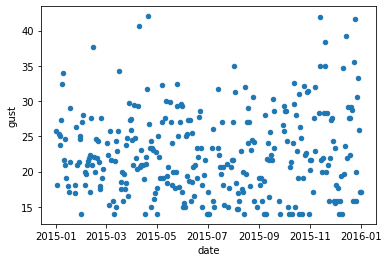

In [31]:
abc.plot(x = 'date', y = 'gust', kind = 'scatter')

In [ ]:
# Save weather data to CSV files.

names = ['weather_2015', 'weather_2016', 'weather_2017', 'weather_2018', 'weather_2019']

for index in range(len(names)):
  with open('/gdrive/My Drive/{}.csv'.format(names[index]), 'w') as f:
    weather[index].to_csv(f)